# Proyecto 4 #

## *Aprendizaje supervisado para evaluar la salud de un bebé durante el parto* ##

### Fase 1: Carga de datos y análisis descriptivo. ###

In [1]:
import numpy as np
import pandas as pd

In [2]:
# CARGA DE LOS DATOS
df = pd.read_csv ("ASI_casoPractico.csv",sep=";")

In [3]:
# PRIMERAS 5 FILAS PARA CHEQUEAR QUE ESTE BIEN CARGADO EL ARCHIVO
df.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [4]:
# NOMBRE DE LAS COLUMNAS
df.columns

Index(['ID', 'b', 'e', 'LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'Target'],
      dtype='object')

### Descripción y clasificación de las variables según su tipo ###

*Es importante saber de que se trata cada variable para realizar nuestro análisis*

In [5]:
# b: Start time - VARIABLE CUANTITATIVA CONTINUA
# e: End time - VARIABLE CUANTITATIVA CONTINUA
# LBE : Fetal heart rate baseline (beats per minute) - VARIABLE CUANTITATIVA DISCRETA
# AC : Number of accelerations per second - VARIABLE CUANTITATIVA DISCRETA
# FM : Number of fetal movements per second - VARIABLE CUANTITATIVA DISCRETA
# UC : Number of uterine contractions per second - VARIABLE CUANTITATIVA DISCRETA
# ASTV : Percentage of time with abnormal short-term variability - VARIABLE CUANTITATIVA CONTINUA
# MSTV : Mean value of short-term variability - VARIABLE CUANTITATIVA CONTINUA
# ALTV : Percentage of time with abnormal long-term variability - VARIABLE CUANTITATIVA CONTINUA
# MLTV : Mean value of long-term variability - VARIABLE CUANTITATIVA CONTINUA
# DL : Number of light decelerations per second - VARIABLE CUANTITATIVA DISCRETA
# DS : Number of severe decelerations per second - VARIABLE CUANTITATIVA DISCRETA
# DP : Number of prolonged decelerations per second - VARIABLE CUANTITATIVA DISCRETA
# DR : Number of repetitive decelerations per second - VARIABLE CUANTITATIVA DISCRETA
# Width : Width of FHR histogram - VARIABLE CUANTITATIVA CONTINUA
# Min : Minimum (low frequency) of FHR histogram - VARIABLE CUANTITATIVA CONTINUA
# Max : Maximum (high frequency) of FHR histogram - VARIABLE CUANTITATIVA CONTINUA
# Nmax : Number of histogram peaks - VARIABLE CUANTITATIVA DISCRETA
# Nzeros : Number of histogram zeros - VARIABLE CUANTITATIVA DISCRETA
# Mode : Histogram mode - VARIABLE CUANTITATIVA DISCRETA
# Mean : Histogram mean - VARIABLE CUANTITATIVA CONTINUA
# Median : Histogram median - VARIABLE CUANTITATIVA DISCRETA
# Variance : Histogram variance - VARIABLE CUANTITATIVA CONTINUA
# Tendency : Histogram tendency - VARIABLE CUANTITATIVA DISCRETA
# Target : Fetal state class code - VARIABLE CUALITATIVA DICOTÓMICA DISCRETA

In [6]:
# SE ELIMINAN COLUMNAS NO NECESARIAS
df.drop(["ID","b","e","DR"], axis = 1, inplace = True)

### Exploración de datos ###

In [7]:
# CARGA DE LAS LIBRERIAS

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

# Configuración MatPlotLib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

In [8]:
# INFORMACION DEL CONJUNTO DE DATOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [9]:
# FILAS Y COLUMNAS DE NUESTRO DATA SET
df.shape

(2126, 22)

In [10]:
# MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


In [11]:
# VALORES NULOS
df.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

Text(0.5, 1.0, 'Distribución de la variable target')

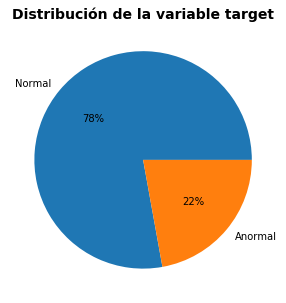

In [12]:
# DISTRIBUCION DE LA FRECUENCIA
a, b = df['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
plt.title ("Distribución de la variable target",fontweight='black',fontsize = 14)

In [13]:
print(df["Target"].value_counts())

0    1655
1     471
Name: Target, dtype: int64


Text(0.5, 1, 'Correlación entre las variables con el target')

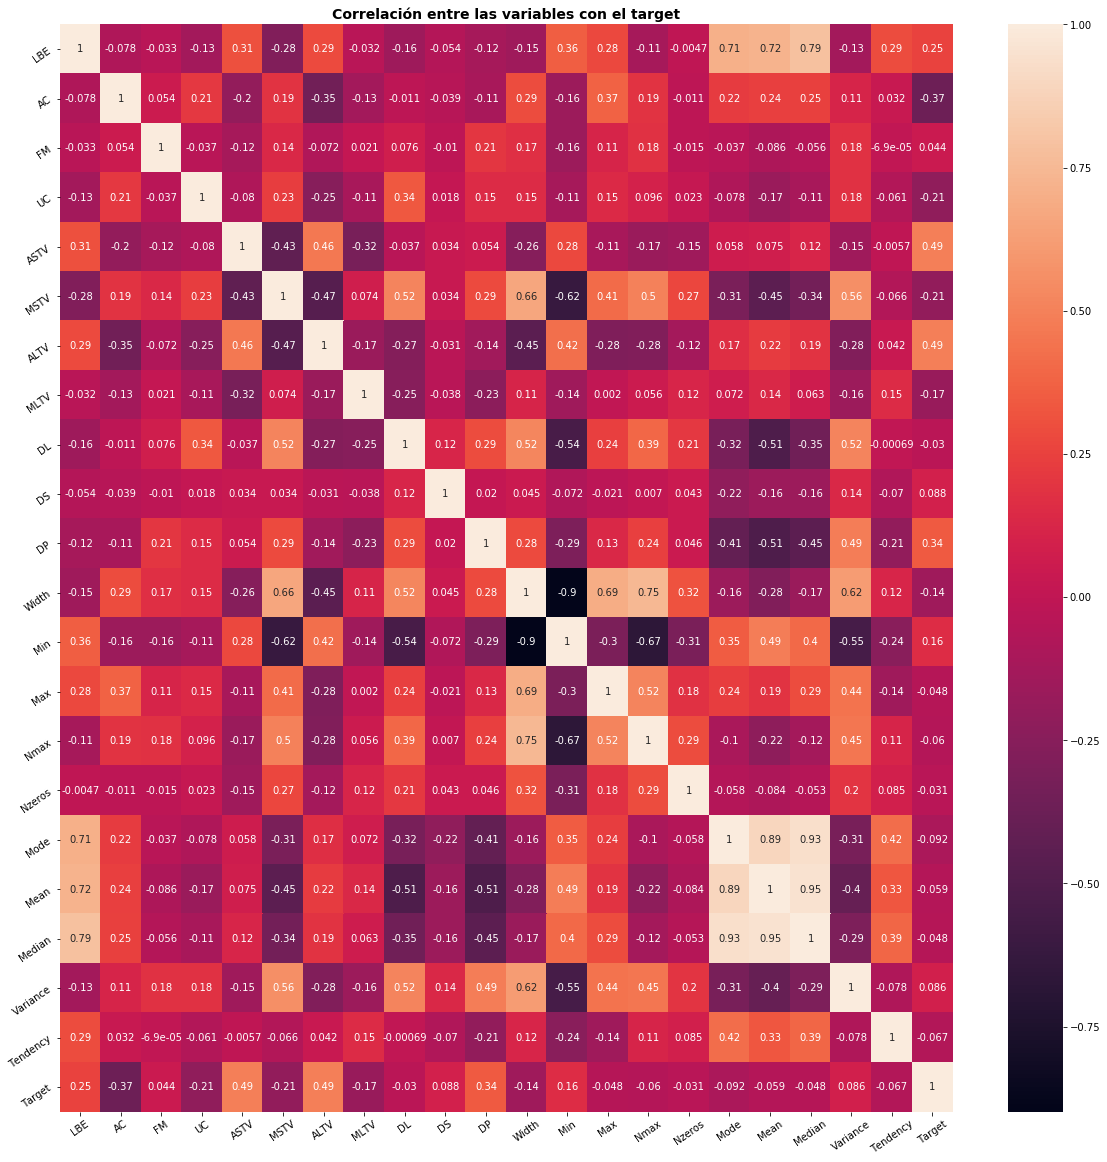

In [14]:
# Correlación de las variables para determinar las mejores para predecir la salud del bebe en el parto.

corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.xticks(rotation = 35)
plt.yticks(rotation = 35)
plt.title ("Correlación entre las variables con el target",
          fontweight='black',fontsize = 14)

*De acuerdo al mapa de calor, las tres variables con mayor correlación con el target son **ASTV**, **ALTV** y **DP** por lo que serán las variables con las que vamos a trabajar*

Text(0, 0.5, 'Porcentaje de tiempo')

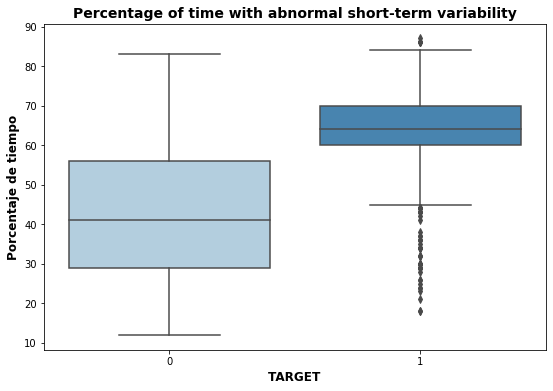

In [15]:
# Variable ASTV : Percentage of time with abnormal short-term variability
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'ASTV', data = df, palette="Blues")
plt.title ('Percentage of time with abnormal short-term variability',fontweight='black',fontsize = 14)
plt.xlabel ('TARGET',fontweight='black',fontsize = 12)
plt.ylabel ('Porcentaje de tiempo',fontweight='black',fontsize = 12)

*Fig 1. : En los fetos anormales, el porcentaje de tiempo con variabilidad a corto plazo es mayor en los fetos anormales que en los normales.*

Text(0, 0.5, 'Porcentaje de tiempo')

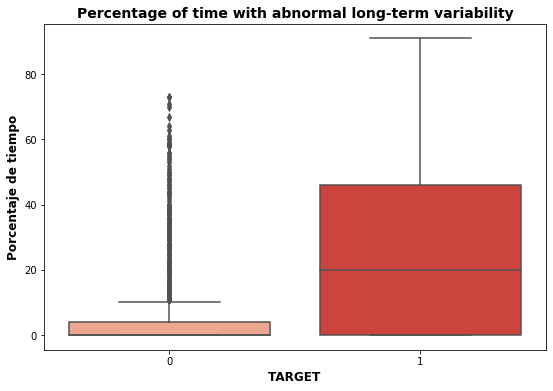

In [16]:
# Variable ALTV : Percentage of time with abnormal long-term variability
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'ALTV', data = df, palette="Reds")
plt.title ('Percentage of time with abnormal long-term variability',fontweight='black',fontsize = 14)
plt.xlabel ('TARGET',fontweight='black',fontsize = 12)
plt.ylabel ('Porcentaje de tiempo',fontweight='black',fontsize = 12)

*Fig 2. : En los fetos anormales, el porcentaje de tiempo con variabilidad a largo plazo es mayor en los fetos anormales que en los normales, siendo en estos un porcentaje muy bajo.*

Text(0, 0.5, 'Desaceleraciones por segundo')

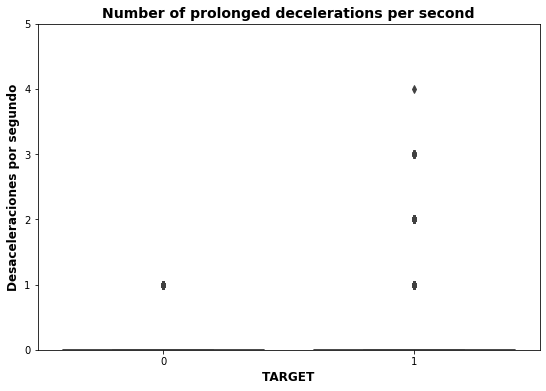

In [17]:
# Variable DP : Number of prolonged decelerations per second
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'DP', data = df, palette="Greens")
plt.ylim (0,5.0)
plt.title ('Number of prolonged decelerations per second',fontweight='black',fontsize = 14)
plt.xlabel ('TARGET',fontweight='black',fontsize = 12)
plt.ylabel ('Desaceleraciones por segundo',fontweight='black',fontsize = 12)

*Fig 3. : En los fetos normales, las desaceleraciones por segundo son un evento raro, siendo que en los anormales pueden existir entre 1 y 4 desaceleraciones por segundo.*

### Fase 2: Muestreo. Conjunto de entrenamiento y test. ###

In [18]:
# Dividimos nuestra muestra en test y train
# Importamos la librería necesaria de sci kit learn

from sklearn.model_selection import train_test_split
# Utilizamos en X todas las variables menos el target, que es y

X = df.loc[:, df.columns != "Target"]
y = df.loc[:, df.columns == "Target"]

# Dividimos el train y test en un 60 y 40 % de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.60, random_state = 0)

### Fase 3: Ajuste del algoritmo de Naive Bayes. ###

### Algoritmo Naive Bayes Gaussiano ###

In [19]:
# Modelo Naive Bayes
# En este caso al tener mayor número de variables continuas se utiliza el modelo Gaussiano

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(X_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(X_train) 
y_pred_test = modelNB.predict_proba(X_test)


### Curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test. ###

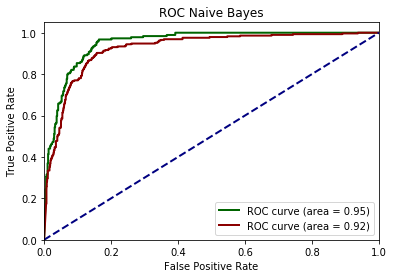

In [20]:
# # VALIDACION
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# CURVA ROC Y AUC PARA TRAINING
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# CURVA ROC Y AUC PARA TEST
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# GRAFICA
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Naive Bayes")
plt.legend(loc="lower right")
plt.show()


*El resultado de nuestra curva es óptimo, con un área en 0.95 para el train y 0.92 para el test. Además, al realizar la validación de nuestro modelo vemos que ambas curvas tienden a trabajar algo separadas , lo que nos habla de que nuestro modelo se encuentra sobreajustado (overfitting).*

## Fase 4: Ajuste del algoritmo de Support Vector Machine. ##

### A partir del conjunto de entrenamiento y test creados en el segundo sprint, ajuste un modelo utilizando el algoritmo SVM dejando los valores por defecto. ###

In [21]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
X = df.loc[:, df.columns != "Target"]
y = df.loc[:, df.columns == "Target"]

In [23]:
# SVM Lineal
svmLineal = svm.SVC(C = 1
                    ,kernel='linear'
                    ,degree = 1
                    ,probability = True) 

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# VALIDACION CON EL CONJUNTO DE TEST 
y_proba_train_svm = svmLineal.predict_proba(X_train)
y_proba_test_svm = svmLineal.predict_proba(X_test)

In [24]:
# Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)
# 
# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

### Curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test. ###

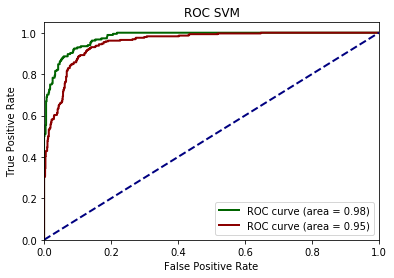

In [25]:
# Curva ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC SVM")
plt.legend(loc="lower right")
plt.show()

*El resultado de nuestra curva es muy bueno, con un área en 0.98 para el train y 0.95 para el test. Además, al realizar la validación de nuestro modelo vemos que ambas curvas tienden a trabajar juntas, lo que nos habla de que nuestro modelo no se encuentra sobreajustado (overfitting).*

### Comparación de ambos modelos: curva ROC y el AUC para el conjunto de test clasificado con Naive Bayes y con SVM. ###

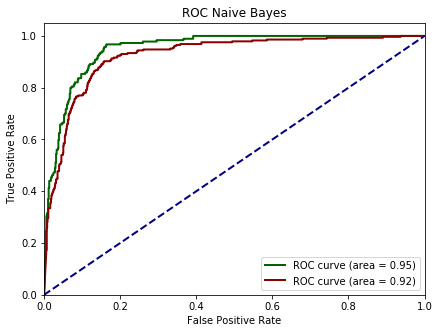

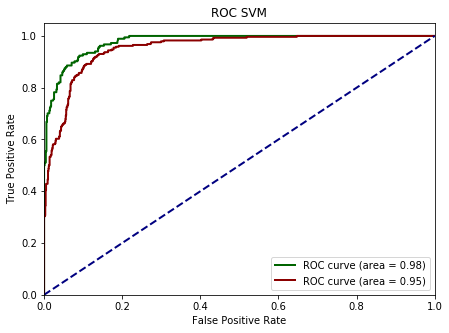

In [26]:
ax = plt.subplots(figsize=(15,5))
plt.subplot (1,2,1)

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Naive Bayes")
plt.legend(loc="lower right")
plt.show()

ax = plt.subplots(figsize=(7,5))
plt.subplot (1,1,1)
plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC SVM")
plt.legend(loc="lower right")
plt.show()

### Conclusión ###

*Al comparar el resultado de ambas curvas vemos que la Curva Roc y el AUC mejora con el modelo Support Vector Machine en comparación el modelo Naive Bayes. Lo determinamos a partir del resultado de 0.95 del train y 0.92 del test del Naive Bayes vs el 0.98 del train y el 0.95 del test del SVM. Creo que podemos mejorar ajustando los parámetros los resultados del SVM para evitar el sobre ajuste (overfitting). Pero mi pregunta es, qué sucede si solo utilizamos las variables más significativa en lugar de todas las variables?*

### Fase 5: Validación del algoritmo escogido a partir de la curva ROC, el área bajo la curva, la matriz de confusión y la precisión. Evaluar si existe sobreajuste. ###

In [27]:
# Utilizamos solamente las variables que mayor correlación tienen.

vars = ['ALTV','ASTV']
X = df[vars]
y = df.loc[:, df.columns == "Target"]

In [28]:
# SVM Lineal
svmLineal = svm.SVC(C = 0.5
                    ,kernel='linear'
                    ,degree = 1
                    ,probability = True) 

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# VALIDACION CON EL CONJUNTO DE TEST 
y_proba_train_svm = svmLineal.predict_proba(X_train)
y_proba_test_svm = svmLineal.predict_proba(X_test)

In [29]:
# Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

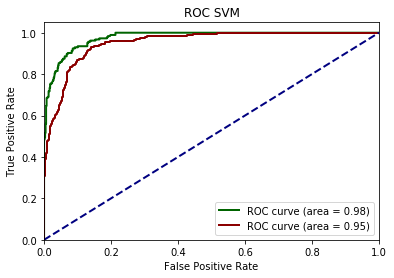

In [30]:
# Curva ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC SVM")
plt.legend(loc="lower right")
plt.show()

*De acuerdo al resultado, y observando que no hay casi diferencias, interpreto que en el arte de conformar modelos, no siempre el utilizar todas las variables es lo mejor, sino que el uso de las variables más significativas y con un modelo bien ajustado, podemos lograr buenos resultados. Vemos que no tiene sobreajuste nuestra curva ROC ya que ambas se comportan de manera similar.*

*El algoritmo seleccionado es el SVM utilizando las variables con mayor correlación con la variable target.*

In [31]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 10, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

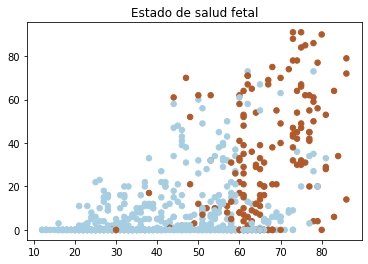

In [32]:
fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(X_train.ASTV, X_train.ALTV, c = y_train.Target, s=30, cmap=plt.cm.Paired)
ax.set_title("Estado de salud fetal");

In [33]:
# Predicciones test
# ==============================================================================
predicciones_train = modelo.predict(X_train)
predicciones_test = modelo.predict(X_test)

In [34]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(y_true = y_train,y_pred = predicciones_train,normalize = True)
print(f"El accuracy de training es: {100*accuracy}%")

accuracy = accuracy_score(y_true = y_test,y_pred = predicciones_test,normalize = True)
print(f"El accuracy de test es: {100*accuracy}%")

precision = precision_score(y_true = y_train,y_pred = predicciones_train)
print(f"La precision de training es: {100*accuracy}%")

precision = precision_score(y_true = y_test,y_pred = predicciones_test)
print(f"La precision de test es: {100*accuracy}%")

# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.Target.ravel(),
    predicciones_test,
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)

El accuracy de training es: 92.82352941176471%
El accuracy de test es: 88.79310344827587%
La precision de training es: 88.79310344827587%
La precision de test es: 88.79310344827587%
Predicción    0    1
Real                
0           939   50
1            93  194


In [35]:
# tasa_error = FN / FN + VP
tasa_error = 93 / (93 + 939)
print ("la tasa de error es:", tasa_error)
# especificidad = VN / VN + VP
especificidad = 194 / (50 + 194) * 100
print ("la especificidad es:", especificidad)
# sensibilidad = VP / VP + FN 
sensibilidad = 939 / (939 + 93) * 100
print ("la sensibilidad es:", sensibilidad)

la tasa de error es: 0.09011627906976744
la especificidad es: 79.50819672131148
la sensibilidad es: 90.98837209302324


***Observamos que el accuracy de nuestro modelos es bueno. Tenemos un bajo porcentaje de Falsos Negativos (nuestro algoritmo dice que se trata de un feto normal y en realidad es un feto anormal) que en mi opinión es lo que mas me interesa de nuestro modelo, evitar el error tipo II. Creo que el algoritmo es recomendable para estimar el estado de salud del feto durante el parto.***

### Fase adicional: Búsqueda de la mejor combinación de hiperparámetros en el algoritmo de SVM utilizando la función Grid Search de Scikit Learn. ###

In [36]:
from sklearn.model_selection import GridSearchCV
 
# Hiperparametros
param_grid = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1,1,10]},
    {"kernel": ["linear"], "C": [0.1,1,10]},
    {"kernel": ["poly"], "C": [0.1,1,10], "degree": [2,3]},
]
 
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid, 
        scoring    = 'roc_auc', # roc_auc, accuracy
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,NaN,linear,NaN,0.972763,0.006146,0.978292,0.003120
8,10,NaN,linear,NaN,0.972615,0.006689,0.978248,0.002404
6,0.1,NaN,linear,NaN,0.970036,0.005090,0.976295,0.003623
5,10,0.0001,rbf,NaN,0.961823,0.014141,0.983420,0.002513
3,1,0.0001,rbf,NaN,0.952590,0.006158,0.962877,0.005453
14,10,NaN,poly,3,0.945379,0.017167,0.956357,0.005704
13,10,NaN,poly,2,0.941617,0.013352,0.949425,0.006359
2,1,0.001,rbf,NaN,0.939706,0.013644,0.989122,0.003152
1,0.1,0.0001,rbf,NaN,0.933094,0.005484,0.938138,0.002928
12,1,NaN,poly,3,0.932600,0.016972,0.938451,0.007922


In [37]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


*Luego de obtener los mejores parametros, modificamos los hiperparámetros para obtener nuestro mejor modelo.*

In [38]:
# SVM Lineal
svmLineal = svm.SVC(C=1, kernel = 'linear', break_ties=False, cache_size=200, 
                    class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, 
                    gamma='scale', max_iter=-1, probability=True, 
                    random_state=None, shrinking=True, tol=0.001, verbose=False) 

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# VALIDACION CON EL CONJUNTO DE TEST 
y_proba_train_svm = svmLineal.predict_proba(X_train)
y_proba_test_svm = svmLineal.predict_proba(X_test)

In [39]:
# Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

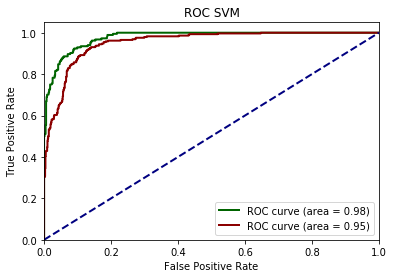

In [40]:
# Curva ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC SVM")
plt.legend(loc="lower right")
plt.show()

*Durante el proceso de modificación de hiperparámetros, inicié el modelo con SVM lineal y obtuve un resultado aceptable. Luego para comprobar la modificiación utilicé un kerneal Gaussiano y se venía las diferencias que existían entre un modelo y otro.*